In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Questions to answer:

- Can we predict the power generation based on the weather
- Can we identify faulty or suboptimally performing equipment?
- Can we identify the need for panel cleaning/maintenance?

# Import Datasets
There are 4 datasets to work with. 
- 2 Generation datasets
- 2 Weather sensor datasets

In [2]:
gen1 = pd.read_csv('./Plant_1_Generation_Data.csv')
gen2 = pd.read_csv('./Plant_2_Generation_Data.csv')
sen1 = pd.read_csv('./Plant_1_Weather_Sensor_Data.csv')
sen2 = pd.read_csv('./Plant_2_Weather_Sensor_Data.csv')

In [3]:
data_sets = [gen1, gen2, sen1, sen2]

# Define Utility Functions
Let's define the following functions to use in data cleaning and preprocessing.
We will try to use functions to keep out code neater.

* Show info for each dataframe
* Convert clomuns names to lower case
* Convert dates to datetime format
* Plot scatter plots
* Plot correlation chart

In [31]:
# Show info on multiple datasets
def show_info(dfs):
    """
    Takes list of DataFrame names
    Prints data info from list of DataFrames.
    """
    for _ in dfs:
        
        _.info()
        print('\n')
        print('\n')
        

# Convert column headers to lower case
def columns_lower(dfs):
    """
    Takes a list of DataFrames and converts column names to lower case.
    Returns each DataFrame with new columns.
    """
    new_dfs = []
    
    for _ in dfs:    
        _.columns = [i.lower() for i in _.columns]
        new_dfs.append(_)
        
    return new_dfs


# Convert date fields to datetime
def date_time_a(old_date):
    """
    Takes old date format. Returns datetime '%d-%m-%Y %H:%M'
    """
    return pd.to_datetime(old_date, format='%d-%m-%Y %H:%M')


# Convert date fields to datetime
def date_time_b(old_date):
    """
    Takes old date format. Returns datetime '%Y-%m-%d %H:%M:%S'
    """
    return pd.to_datetime(old_date, format='%Y-%m-%d %H:%M:%S')


# Plot scatterplot
def plot_scatter(df, feat_1, feat_2):
    plt.figure(figsize=(8,9))
    sns.scatterplot(data=df, x=feat_1, y = feat_2)
    plt.xlabel = f'{feat_1}'
    plt.ylabel = f'{feat_2}'
    plt.title('{} by {}'.format(feat_1, feat_2), fontsize=15)
    plt.show()
    

# Plot correlation
def plot_corr(df, method = 'pearson', annot = True, **kwargs):
    sns.clustermap(df.corr(method), 
    vmin = -1.0, 
    vmax = 1.0, 
    cmap = 'icefire', 
    method = 'complete', 
    annot = annot, 
    **kwargs)



In [5]:
show_info(data_sets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6  

# Part 1. Data Preprocessing

Convert all columns to lower case in all datasets

In [6]:
# Convert all columns to lower case using user-defined function
# Reassign the original DataFrame names to the converted Datasets
data_sets = columns_lower(data_sets)

In [7]:
# Now we can call each dataframe seperately
gen1.head(5)

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Convert dates to DateTime

In [8]:
# Apply date converter to date_time columns
gen1['date_time'] = gen1['date_time'].apply(date_time_a).apply(date_time_b)
gen2['date_time'] = gen2['date_time'].apply(date_time_b)
sen1['date_time'] = sen1['date_time'].apply(date_time_b)
sen2['date_time'] = sen2['date_time'].apply(date_time_b)

Merge Datasets

In [9]:
# Merge generation data1 and weather data1. 
# Merge generation data2 and weather data2
df1 = pd.merge(gen1, sen1, how='inner', on='date_time')
df2 = pd.merge(gen2, sen2, how='inner', on='date_time')

# Concatenate both datasets
df = pd.concat([df1,df2], axis=0)

In [10]:
# We can take a look at th resulting DataFrame
df.head()

,date_time,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,plant_id_y,source_key_y,ambient_temperature,module_temperature,irradiation
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [11]:
df[df['daily_yield'] == 0].daily_yield.count() / df.daily_yield.count()

0.22176710240928543

In [12]:
# Remove days where generation is 0
df_new = df.query("daily_yield != 0 & ac_power > 0")

In [13]:
# Remove duplicated columns
df_new2 = df_new.drop([i for i in df_new.columns if i.endswith('_y')], axis=1)

In [15]:
df_new2.head()

,date_time,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation
531,2020-05-15 06:15:00,4135001,1BY6WEcLGh8j5v7,278.000000,26.862500,2.625000,6259561.625,24.011635,22.353459,0.022282
532,2020-05-15 06:15:00,4135001,1IF53ai7Xc0U56Y,310.571429,30.014286,3.000000,6183648.000,24.011635,22.353459,0.022282
533,2020-05-15 06:15:00,4135001,3PZuoBAID5Wc2HD,318.625000,30.775000,3.500000,6987762.500,24.011635,22.353459,0.022282
534,2020-05-15 06:15:00,4135001,7JYdWkrLSPkdwr4,316.250000,30.562500,3.500000,7602963.500,24.011635,22.353459,0.022282
535,2020-05-15 06:15:00,4135001,McdE0feGgRqW7Ca,311.428571,30.100000,3.142857,7158967.143,24.011635,22.353459,0.022282


In [34]:
# Strip columns that end with '_x'
df_new2.columns = [i.strip('_x') if i.endswith('_x') else i for i in df_new2.columns]

In [35]:
df_new2.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation
531,2020-05-15 06:15:00,4135001,1BY6WEcLGh8j5v7,278.000000,26.862500,2.625000,6259561.625,24.011635,22.353459,0.022282
532,2020-05-15 06:15:00,4135001,1IF53ai7Xc0U56Y,310.571429,30.014286,3.000000,6183648.000,24.011635,22.353459,0.022282
533,2020-05-15 06:15:00,4135001,3PZuoBAID5Wc2HD,318.625000,30.775000,3.500000,6987762.500,24.011635,22.353459,0.022282
534,2020-05-15 06:15:00,4135001,7JYdWkrLSPkdwr4,316.250000,30.562500,3.500000,7602963.500,24.011635,22.353459,0.022282
535,2020-05-15 06:15:00,4135001,McdE0feGgRqW7Ca,311.428571,30.100000,3.142857,7158967.143,24.011635,22.353459,0.022282


/var/folders/tk/l8jl358x18q85155m0fs7ldh0000gn/T/ipykernel_98906/3665476256.py:57: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(method),


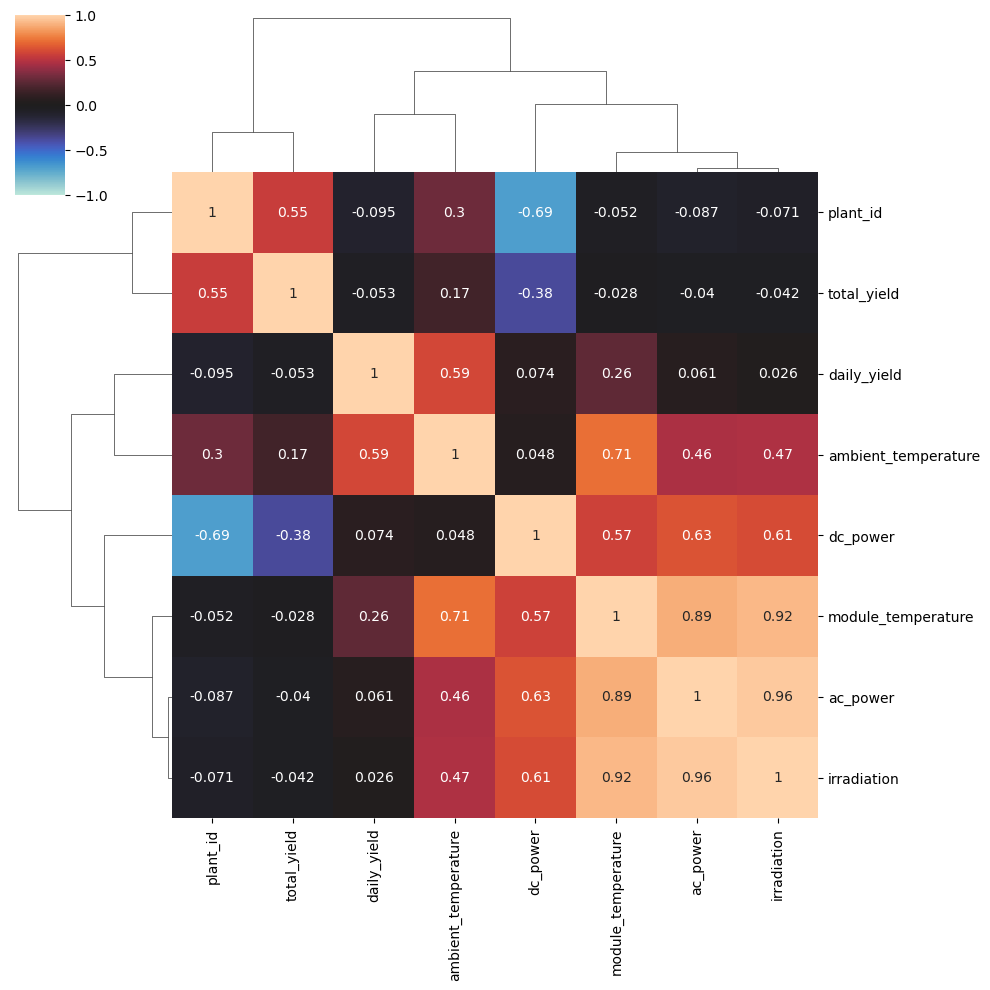

In [36]:
# Plot a correlation chart
plot_corr(df_new2)

In [41]:
# Check correlation data
df_new2.corr()

/var/folders/tk/l8jl358x18q85155m0fs7ldh0000gn/T/ipykernel_98906/3698497241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new2.corr()


,plant_id,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation
plant_id,1.000000,-0.694510,-0.087329,-0.094687,0.547818,0.302396,-0.052148,-0.070830
dc_power,-0.694510,1.000000,0.625683,0.073941,-0.379645,0.048213,0.566954,0.605361
ac_power,-0.087329,0.625683,1.000000,0.061261,-0.039547,0.464106,0.890201,0.963654
daily_yield,-0.094687,0.073941,0.061261,1.000000,-0.052972,0.592123,0.259243,0.025543
total_yield,0.547818,-0.379645,-0.039547,-0.052972,1.000000,0.171343,-0.028386,-0.041515
ambient_temperature,0.302396,0.048213,0.464106,0.592123,0.171343,1.000000,0.711677,0.472722
module_temperature,-0.052148,0.566954,0.890201,0.259243,-0.028386,0.711677,1.000000,0.916068
irradiation,-0.070830,0.605361,0.963654,0.025543,-0.041515,0.472722,0.916068,1.000000


In [47]:
# Only data for times where there is power
power = df_new2.query("dc_power > 0 & ac_power > 0")

/var/folders/tk/l8jl358x18q85155m0fs7ldh0000gn/T/ipykernel_98906/3665476256.py:57: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(method),


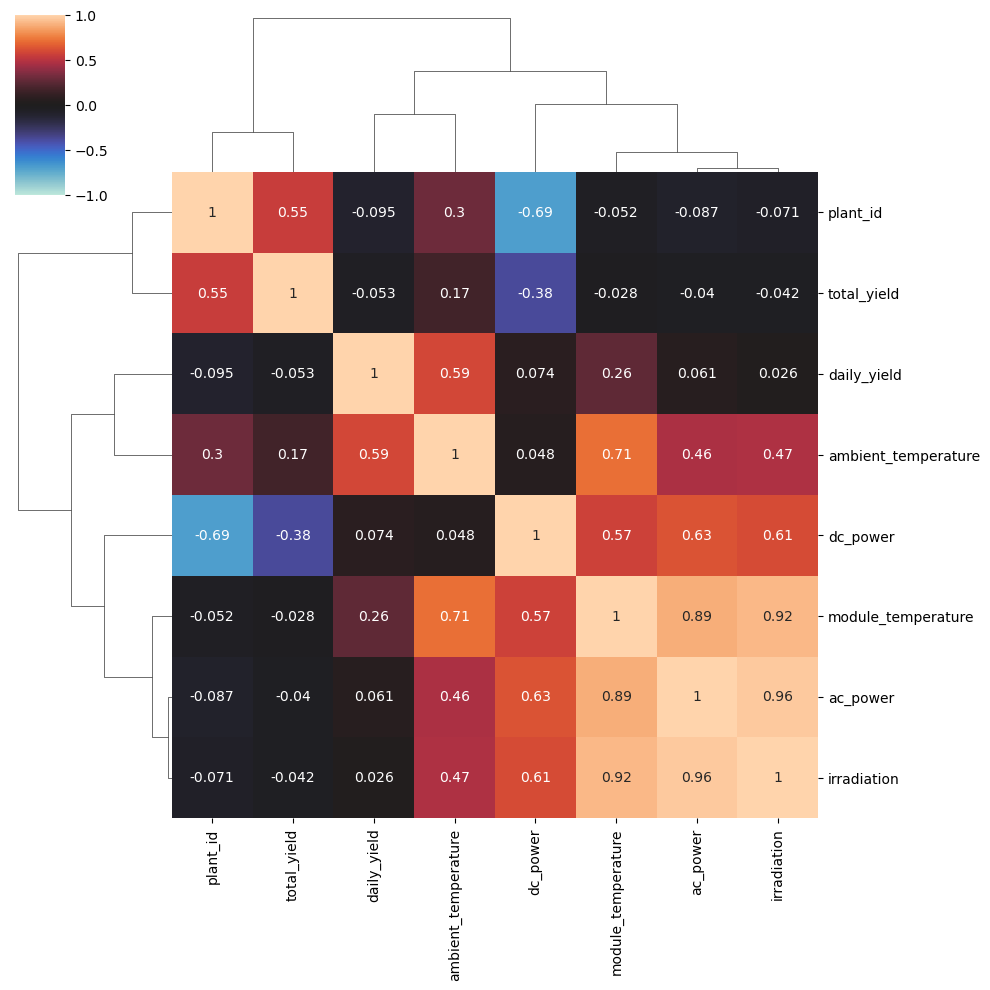

In [48]:
plot_corr(power)

# Part 2. Building and training model

We can finally run a linear regression model against our data to predict power generation.
We will run a multiple regression model as follows;

* Dependent variable y = ac_power
* Independent variables / features = ambient_temperature, module_temperature, irradiation, plant_id

### Getting inputs and outputs

In [54]:
X = df_new2[['ambient_temperature', 'module_temperature', 'irradiation',
    'plant_id']].values

In [55]:
y = df_new2['ac_power'].values

### Creating training and test sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
X_train

array([[3.32896522e+01, 5.31209666e+01, 9.22336359e-01, 4.13600100e+06],
       [2.21557047e+01, 2.27330180e+01, 1.61645104e-01, 4.13500100e+06],
       [2.63948039e+01, 3.48848720e+01, 4.37950496e-01, 4.13600100e+06],
       ...,
       [3.52493804e+01, 5.61734161e+01, 7.76220931e-01, 4.13600100e+06],
       [3.68891539e+01, 4.30381529e+01, 2.37599299e-01, 4.13600100e+06],
       [2.72275748e+01, 2.93475173e+01, 3.63448681e-01, 4.13600100e+06]])

### Building and training the model 

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Inference

Making the predictions of the data points in the test set


In [66]:
y_pred = model.predict(X_test)

In [67]:
y_pred

array([ 357.02002341,  238.41572748, 1052.19138158, ...,  107.16026916,
        122.48724126, 1170.79486153])

### Evaluating the model

### R-Squared

In [68]:
r2 = r2_score(y_test, y_pred)

In [69]:
r2

0.9252062345895968

As we can see above, our model has an R-Squared value of 93%

### Adjusted  R2

In [70]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [71]:
adj_r2

0.9251844240580198